In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [3]:
models_results = []

In [4]:
def evaluate_model(model, X_train, y_train, X_test, y_test, zone="Whole City"):
    # Predict on training and testing data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate metrics for training data
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    
    # Calculate metrics for testing data
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Print the metrics
    print(f"Model: {model}")
    print("====== Train ========")
    print(f"Training MSE: {train_mse:.7f}")
    print(f"Training MAE: {train_mae:.7f}")
    print(f"Training R-squared: {train_r2:.7f}")
    print("====== Test ========")
    print(f"Testing MSE: {test_mse:.7f}")
    print(f"Testing MAE: {test_mae:.7f}")
    print(f"Testing R-squared: {test_r2:.7f}")
    
    new_row = {
        "Zone": zone,
        "Model": str(model),
        "Train MSE": train_mse,
        "Train MAE": train_mae,
        "Train R2": train_r2,
        "Test MSE": test_mse,
        "Test MAE": test_mae,
        "Test R2": test_r2
    }
    
  
    models_results.append(new_row)

    


In [5]:
def preprocess_data(df):
    # Melt the DataFrame to long format
    df_melted = df.melt(id_vars=['Zone', 'Model'], 
                        value_vars=['Train MSE', 'Train MAE', 'Train R2', 'Test MSE', 'Test MAE', 'Test R2'],
                        var_name='Metric', value_name='Value')

    # Split Metric into Data Type (Train/Test) and Actual Metric for easier plotting
    df_melted[['Data Type', 'Metric']] = df_melted['Metric'].str.split(' ', expand=True)
    
    return df_melted

In [6]:
def plot_results(df_melted):
   
    # Get unique metrics
    unique_metrics = df_melted['Metric'].unique()
    
    # Set the plot style
    sns.set(style="whitegrid")

    # Loop through each metric and create a separate plot
    for metric in unique_metrics:
        # Filter data for training and testing separately
        train_data = df_melted[(df_melted['Metric'] == metric) & (df_melted['Data Type'] == 'Train')]
        test_data = df_melted[(df_melted['Metric'] == metric) & (df_melted['Data Type'] == 'Test')]
        
        # Create separate plots for training and testing data
        for data, data_type in zip([train_data, test_data], ['Train', 'Test']):
            g = sns.catplot(
                data=data, kind="bar",
                x="Zone", y="Value", hue="Model",
                height=4, aspect=2, sharey=False
            )

            # Set plot titles and labels
            g.set_titles("{col_name} - " + metric)
            g.set_axis_labels(data_type + " " + str(metric), "Value")
            g.set_xticklabels(rotation=45)  
            
            # Adjust legend position and font size
            g._legend.set_bbox_to_anchor((1.1, 0.5))  
            g._legend.set_title('Model')  

            # Display the plot
            plt.tight_layout()
            plt.show()


In [8]:
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('data/data-ready.csv')

targets = ["z1", "z2", "z3"]

df.drop("DateTime", inplace=True, axis=1)



# split train and test
X = df.drop(columns=targets, axis=1)

# use standard scaler on 
X_scaler = StandardScaler()
X = pd.DataFrame(X_scaler.fit_transform(X), columns=X.columns)


y1 = df['z1']
y1_scaler = StandardScaler()
y1 = pd.DataFrame(y1_scaler.fit_transform(y1.values.reshape(-1, 1)), columns=['z1'])
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=42)

y2 = df['z2']
y2_scaler = StandardScaler()
y2 = pd.DataFrame(y2_scaler.fit_transform(y2.values.reshape(-1, 1)), columns=['z2'])
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=42)

y3 = df['z3']
y3_scaler = StandardScaler()
y3 = pd.DataFrame(y3_scaler.fit_transform(y3.values.reshape(-1, 1)), columns=['z3'])
X3_train, X3_test, y3_train, y3_test = train_test_split(X, y3, test_size=0.2, random_state=42)

In [9]:
X_train = [X1_train, X2_train, X3_train]
X_test = [X1_test, X2_test, X3_test]
y_train = [y1_train, y2_train, y3_train]
y_test = [y1_test, y2_test, y3_test]

### Testing Base SVM Model

In [10]:
models = []
predictions = []
for i in range(3):
    model = SVR()
    model.fit(X_train[i], y_train[i])
    evaluate_model(model, X_train[i], y_train[i], X_test[i], y_test[i], zone=f"Zone :{i+1}")

/home/froggy/miniforge3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KeyboardInterrupt: 

In [9]:
df["total"] = df["z1"] + df["z2"] + df["z3"]


targetT = df["total"]
yt_scaler = StandardScaler()
targetT = pd.DataFrame(yt_scaler.fit_transform(targetT.values.reshape(-1, 1)), columns=['total'])

XT = df.drop(columns=["z1", "z2", "z3", "total"], axis=1)
XT_scaler = StandardScaler()
XT = pd.DataFrame(XT_scaler.fit_transform(XT), columns=XT.columns)


XT_train, XT_test, yT_train, yT_test = train_test_split(XT, targetT, test_size=0.2, random_state=42)

model = SVR()
model.fit(XT_train, yT_train)
evaluate_model(model, XT_train, yT_train, XT_test, yT_test, zone="Whole City")

Model: SVR()
====== Train ========
Training MSE: 295560501.1791479
Training MAE: 13755.8866590
Training R-squared: -0.0038497
====== Test ========
Testing MSE: 293458255.9924705
Testing MAE: 13768.7183455
Testing R-squared: -0.0061238


In [10]:
from sklearn.model_selection import GridSearchCV

In [11]:
model = SVR(kernel='linear', C=1)
model.fit(XT_train, yT_train)
evaluate_model(model, XT_train, yT_train, XT_test, yT_test, zone="Whole City")

Model: SVR(C=1, kernel='linear')
====== Train ========
Training MSE: 95990195.8898373
Training MAE: 7532.2901984
Training R-squared: 0.6739763
====== Test ========
Testing MSE: 94605891.1884956
Testing MAE: 7503.1290216
Testing R-squared: 0.6756430


In [12]:
model = SVR(kernel='poly', C=1, degree=3)
model.fit(XT_train, yT_train)
evaluate_model(model, XT_train, yT_train, XT_test, yT_test, zone="Whole City")

Model: SVR(C=1, kernel='poly')
====== Train ========
Training MSE: 294828028.7670525
Training MAE: 13701.3365033
Training R-squared: -0.0013619
====== Test ========
Testing MSE: 292801180.5277253
Testing MAE: 13720.5205460
Testing R-squared: -0.0038710


In [13]:
model = SVR(kernel='poly', C=10, degree=2)
model.fit(XT_train, yT_train)
evaluate_model(model, XT_train, yT_train, XT_test, yT_test, zone="Whole City")

Model: SVR(C=10, degree=2, kernel='poly')
====== Train ========
Training MSE: 294626142.7020543
Training MAE: 13506.8317026
Training R-squared: -0.0006762
====== Test ========
Testing MSE: 293020091.0187178
Testing MAE: 13553.5828364
Testing R-squared: -0.0046216


In [14]:
model = SVR(kernel='sigmoid', C=10, degree=2)
model.fit(XT_train, yT_train)
evaluate_model(model, XT_train, yT_train, XT_test, yT_test, zone="Whole City")

Model: SVR(C=10, degree=2, kernel='sigmoid')
====== Train ========
Training MSE: 295081042.8636947
Training MAE: 13714.1154715
Training R-squared: -0.0022212
====== Test ========
Testing MSE: 293042021.9971471
Testing MAE: 13731.9099622
Testing R-squared: -0.0046968


In [15]:
model = SVR(kernel='linear', C=20)
model.fit(XT_train, yT_train)
evaluate_model(model, XT_train, yT_train, XT_test, yT_test, zone="Whole City")

Model: SVR(C=20, kernel='linear')
====== Train ========
Training MSE: 87756069.2197293
Training MAE: 7124.3802854
Training R-squared: 0.7019429
====== Test ========
Testing MSE: 86042933.3913861
Testing MAE: 7067.2309640
Testing R-squared: 0.7050012


In [16]:
model = SVR(kernel='linear', C=5)
model.fit(XT_train, yT_train)
evaluate_model(model, XT_train, yT_train, XT_test, yT_test, zone="Whole City")

Model: SVR(C=5, kernel='linear')
====== Train ========
Training MSE: 89078720.3427441
Training MAE: 7199.2147581
Training R-squared: 0.6974506
====== Test ========
Testing MSE: 87520062.5822339
Testing MAE: 7156.1317307
Testing R-squared: 0.6999368


### Trying PCA

In [17]:
from sklearn.decomposition import PCA

In [18]:
XT_pca = PCA(n_components=0.98).fit_transform(XT)


XT_train, XT_test, yT_train, yT_test = train_test_split(XT_pca, targetT, test_size=0.2, random_state=42)

model = SVR(kernel='linear', C=5)
model.fit(XT_train, yT_train)
evaluate_model(model, XT_train, yT_train, XT_test, yT_test, zone="Whole City")

Model: SVR(C=5, kernel='linear')
====== Train ========
Training MSE: 301089167.1973889
Training MAE: 13435.4317135
Training R-squared: -0.0226274
====== Test ========
Testing MSE: 300064069.4598793
Testing MAE: 13508.5212271
Testing R-squared: -0.0287719


### Re-scaling The Features

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
df = pd.read_csv('data/data-ready.csv')

targets = ["z1", "z2", "z3"]

df.drop("DateTime", inplace=True, axis=1)

# split train and test
X = df.drop(columns=targets, axis=1)
X = StandardScaler().fit_transform(X)
y1 = df['z1']
y1 = StandardScaler().fit_transform(y1.values.reshape(-1, 1))
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=42)

y2 = df['z2']
y2 = StandardScaler().fit_transform(y2.values.reshape(-1, 1))
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=42)

y3 = df['z3']
y3 = StandardScaler().fit_transform(y3.values.reshape(-1, 1))
X3_train, X3_test, y3_train, y3_test = train_test_split(X, y3, test_size=0.2, random_state=42)

In [8]:
X_train = [X1_train, X2_train, X3_train]
X_test = [X1_test, X2_test, X3_test]
y_train = [y1_train, y2_train, y3_train]
y_test = [y1_test, y2_test, y3_test]

In [9]:
models = []
predictions = []
for i in range(3):
    model = SVR()
    model.fit(X_train[i], y_train[i])
    evaluate_model(model, X_train[i], y_train[i], X_test[i], y_test[i], zone=f"Zone :{i+1}")

/home/chaker/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model: SVR()
====== Train ========
Training MSE: 0.0483432
Training MAE: 0.1537248
Training R-squared: 0.9517390
====== Test ========
Testing MSE: 0.0472610
Testing MAE: 0.1542629
Testing R-squared: 0.9524118


/home/chaker/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model: SVR()
====== Train ========
Training MSE: 0.0522807
Training MAE: 0.1600692
Training R-squared: 0.9477500
====== Test ========
Testing MSE: 0.0537829
Testing MAE: 0.1648802
Testing R-squared: 0.9460874


/home/chaker/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model: SVR()
====== Train ========
Training MSE: 0.0284387
Training MAE: 0.1165033
Training R-squared: 0.9716006
====== Test ========
Testing MSE: 0.0281701
Testing MAE: 0.1180050
Testing R-squared: 0.9716699


In [10]:
df["total"] = df["z1"] + df["z2"] + df["z3"]

targetT = df["total"]
XT = df.drop(columns=["z1", "z2", "z3", "total"], axis=1)

targetT = StandardScaler().fit_transform(targetT.values.reshape(-1, 1))
XT = StandardScaler().fit_transform(XT)

XT_train, XT_test, yT_train, yT_test = train_test_split(XT, targetT, test_size=0.2, random_state=42)

In [24]:
model = SVR()
model.fit(XT_train, yT_train)
evaluate_model(model, XT_train, yT_train, XT_test, yT_test, zone="Whole City")

/home/chaker/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model: SVR()
====== Train ========
Training MSE: 0.0355356
Training MAE: 0.1326365
Training R-squared: 0.9645302
====== Test ========
Testing MSE: 0.0354050
Testing MAE: 0.1339823
Testing R-squared: 0.9643268


### Evaluation

/home/chaker/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_15419/750852015.py:33: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


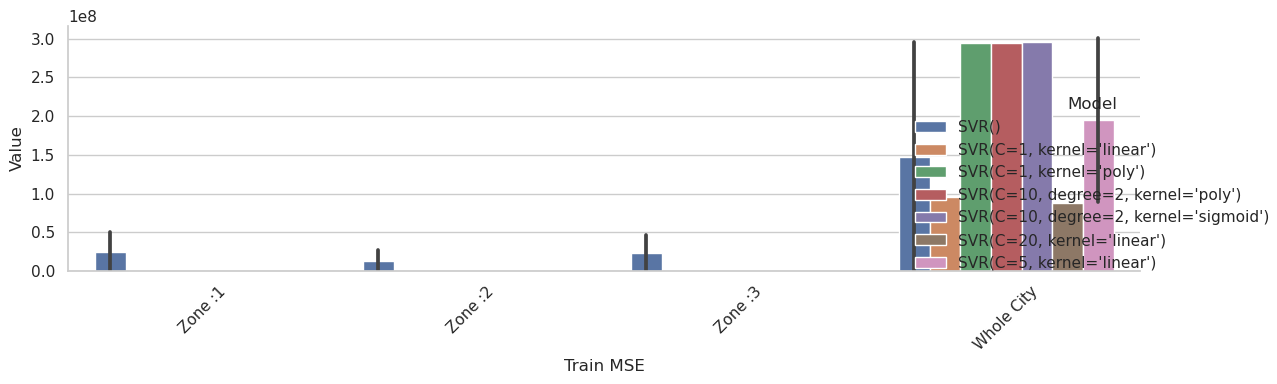

/home/chaker/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_15419/750852015.py:33: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


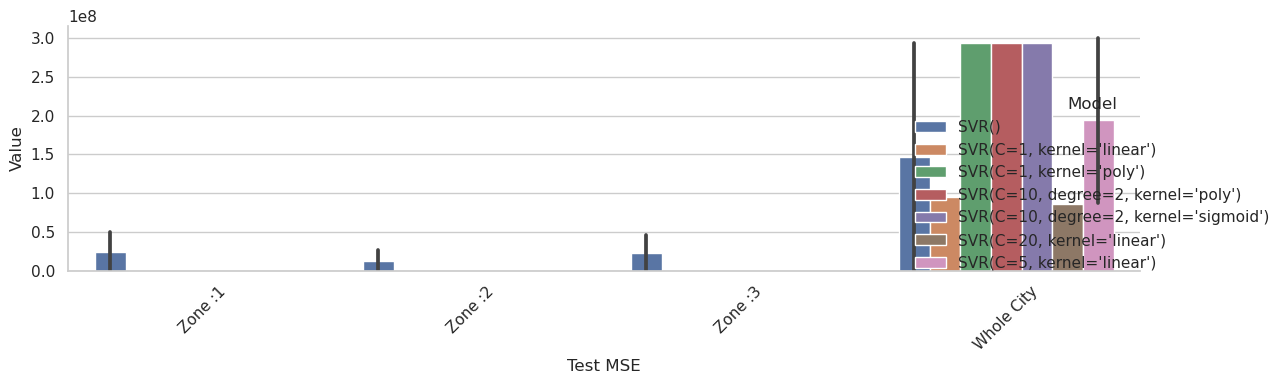

/home/chaker/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_15419/750852015.py:33: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


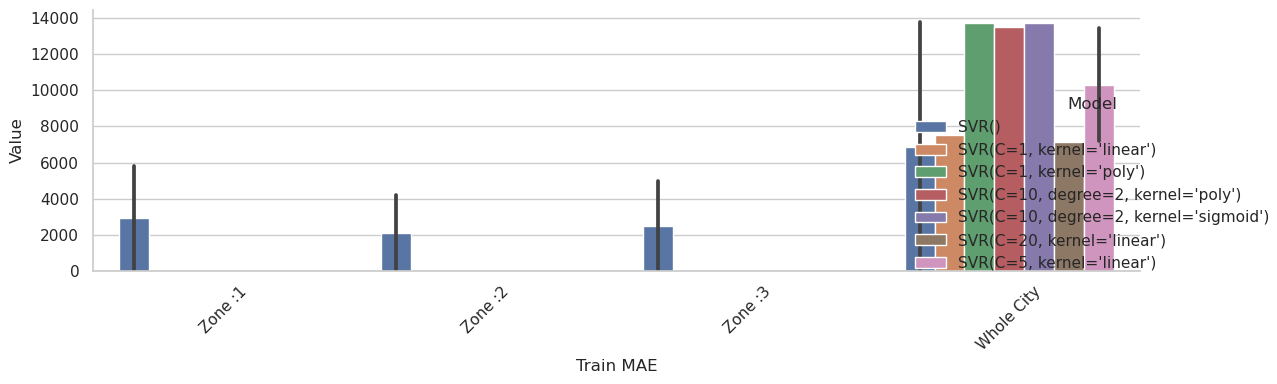

/home/chaker/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_15419/750852015.py:33: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


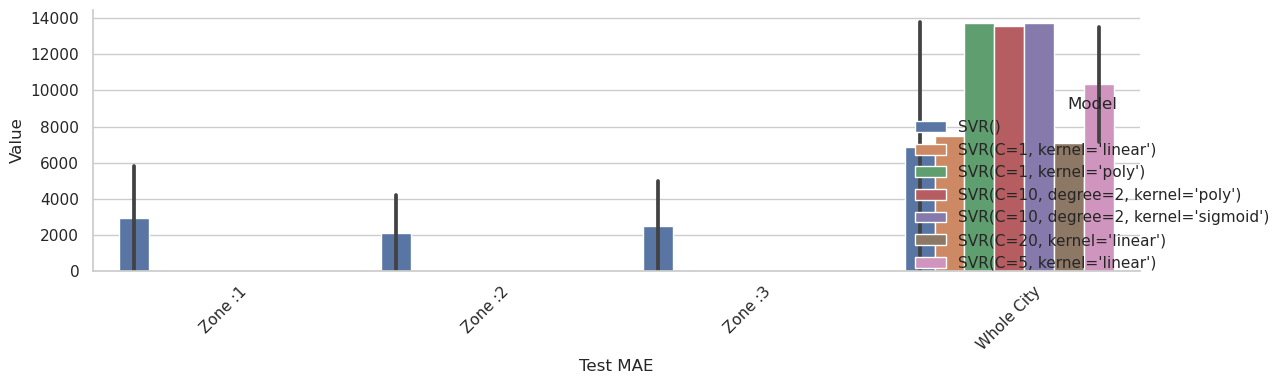

/home/chaker/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_15419/750852015.py:33: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


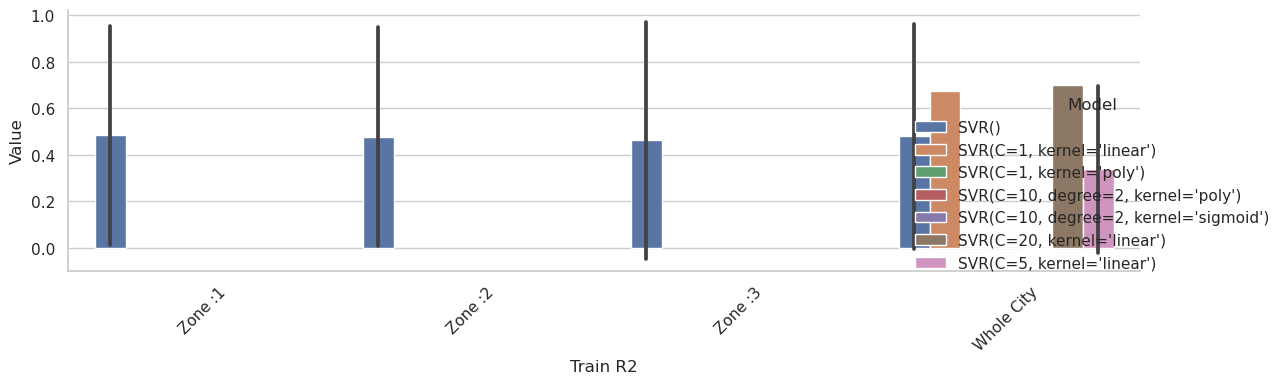

/home/chaker/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_15419/750852015.py:33: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


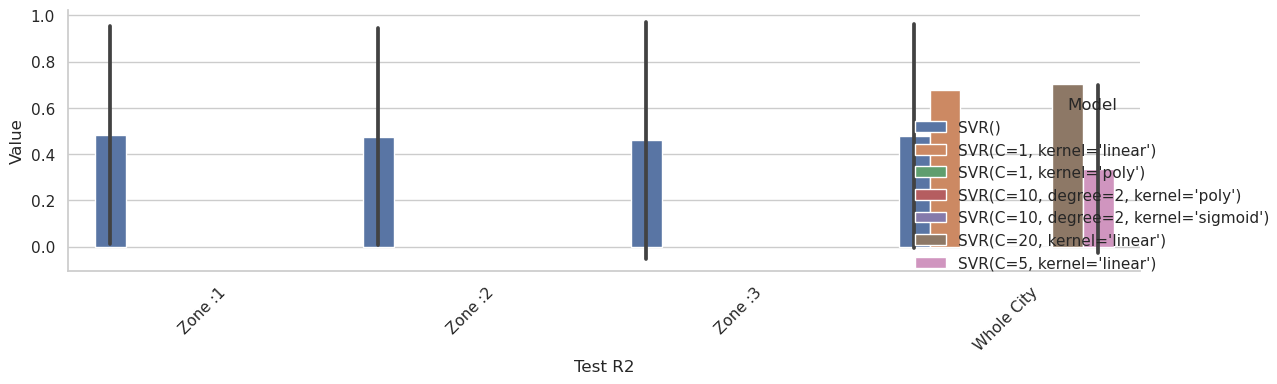

In [25]:
result_df = pd.DataFrame(models_results)

plot_results(preprocess_data(result_df))